In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#for charts
print(torch.__version__)

2.6.0+cu124


# 1.***Basic Neural Network Model***

In [ ]:
class Model(nn.Module):     #4 features flowers , 2 hidden layers , output has 3 classes
  def __init__(self,in_features=4, h1=8 ,h2=9 , out_features=3):    #architecture
    super().__init__()
    self.fc1 = nn.Linear( in_features,h1) # fully connected layer with (input,output)
    self.fc2 = nn.Linear( h1 ,h2)
    self.out = nn.Linear( h2 ,out_features)

  def forward(self, x):   #moves everything forward
   x = F.relu(self.fc1(x)) #start with layer1
   x = F.relu(self.fc2(x)) #move to layer 2 ..
   x = F.relu(self.out(x))

   return x

In [ ]:
torch.manual_seed(41) #random seed for randomization
model = Model() #create a random instance of our Model
#create an instance of above model

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
my_df['variety'] = my_df['variety'].replace({'Setosa':0.0,'Versicolor':1.0,'Virginica':2.0}) #change last column from text to numbers

<ipython-input-6-626ad83577ed>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace({'Setosa':0.0,'Versicolor':1.0,'Virginica':2.0}) #change last column from text to numbers


In [ ]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#2 .***Train***

In [ ]:
X = my_df.drop('variety',axis=1) #removes variety from df , for axis=1 means columns ((if axis=0 means rows))
y = my_df['variety'] #keeps only variety from df
#now they are still dataframes , we need them to be arrays

In [ ]:
X= X.values #turns them into arrays
y= y.values

In [ ]:
from sklearn.model_selection import train_test_split #imports a function

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
X_train = torch.FloatTensor(X_train)  #from array to tensor
X_test = torch.FloatTensor(X_test)    #Float tensor for integers
y_train = torch.LongTensor(y_train)   #LongTensor = 64bit integers
y_test = torch.LongTensor(y_test)

loss entropy

In [ ]:
criterion = nn.CrossEntropyLoss()
#Optimizer , learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model.parameters() #fc1 fc2 output (layers)

<generator object Module.parameters at 0x7b4fcef0e7a0>

In [ ]:
epochs = 100
losses = [] #list
for i in range(epochs):
  y_pred = model.forward(X_train) #send in features to get predicted result

  loss = criterion(y_pred,y_train) #compare predicted to actual value

  losses.append(loss.detach().numpy()) #track losses in a list , from array to number

  if i % 10 == 0:
    print(f'Epoch: {i} and loss is {loss}')

# BACK PROPAGATION
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss is 1.125203251838684
Epoch: 10 and loss is 1.0097211599349976
Epoch: 20 and loss is 0.8516881465911865
Epoch: 30 and loss is 0.6555686593055725
Epoch: 40 and loss is 0.45029518008232117
Epoch: 50 and loss is 0.2718472182750702
Epoch: 60 and loss is 0.1553877890110016
Epoch: 70 and loss is 0.0933627039194107
Epoch: 80 and loss is 0.06463459134101868
Epoch: 90 and loss is 0.05066268518567085


Text(0.5, 0, 'Epoch')

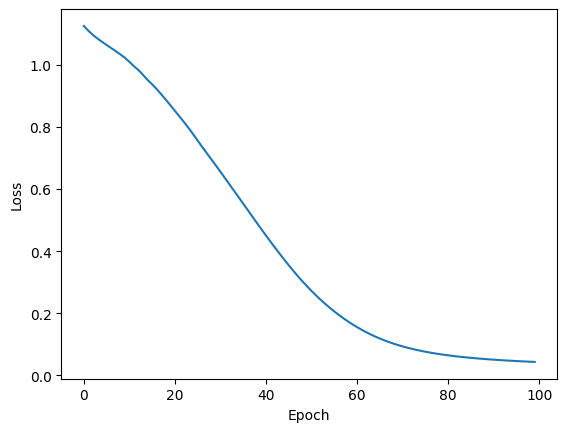

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

#3 .***Evaluation***

In [ ]:
with torch.no_grad(): #turns off backpropagation
 y_eval = model.forward(X_test)  #forward function created in start
 loss = criterion(y_eval, y_test) #loss of test data
 print(loss)  # I want it close to loss of train data

tensor(0.1295)


In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
           #shows predicted class
    print(f'{i+1:>2}.) {str(y_val):<40} {y_test[i]:<5} {y_val.argmax().item()}')
    #      .item convers tensor to scalar            returns index of max value
    # 0,1,2 values according to class , highest value is predicted class

    #print(f'{i+1}.) {str(y_val)}  \t {y_test[i]} \t  {y_val.argmax().item()}')


    if y_val.argmax().item() == y_test[i]:  #1111111111111111111111111
      correct += 1

print(f'We got {correct} correct ')

 1.) tensor([0.0000, 7.4447, 9.9152])         2     2
 2.) tensor([ 0.0000,  7.7042, 14.3743])      2     2
 3.) tensor([ 0.0000,  9.1280, 15.1753])      2     2
 4.) tensor([0.2102, 8.3280, 4.5364])         1     1
 5.) tensor([ 0.0000,  8.4035, 12.4779])      2     2
 6.) tensor([1.6255, 8.0527, 1.9799])         1     1
 7.) tensor([0.0000, 8.0659, 9.2757])         2     2
 8.) tensor([0.3294, 8.4105, 4.3070])         1     1
 9.) tensor([ 0.0000,  8.2367, 10.8423])      2     2
10.) tensor([ 0.0000,  8.1941, 15.2505])      2     2
11.) tensor([0.0000, 7.9806, 8.7350])         2     2
12.) tensor([8.9715, 3.4637, 0.0000])         0     0
13.) tensor([8.0554, 3.1741, 0.0000])         0     0
14.) tensor([2.2377, 6.4805, 0.4353])         1     1
15.) tensor([8.0202, 3.9148, 0.0000])         0     0
16.) tensor([0.0000, 8.1254, 8.0101])         2     1
17.) tensor([8.3626, 3.3009, 0.0000])         0     0
18.) tensor([0.0000, 7.6349, 9.5548])         1     2
19.) tensor([8.9383, 3.4532,

new data evaluation

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2]) #feature of new data

In [ ]:
with torch.no_grad():
  print(model(new_iris)) #passes new data into the model we created

tensor([8.5194, 3.3207, 0.0000])


#4 .***Save and Load Model***

In [ ]:
torch.save(model.state_dict(), 'iris_model.pt' ) #save model

In [ ]:
new_model = Model() #we have already made a class named Model
new_model.load_state_dict(torch.load('iris_model.pt')) # to load trained weights and bias

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)